# Øvelse 1:
I skal afprøve lineær regression på Diabetes datasæt i Scikit Learn (OBS: Start med at se ”tips”
nedenunder).

## a)

Plot “Disease progression” (target værdi – mål for hvor meget sygdommen har udviklet sig, dvs.
”hvor syg man er”) i forhold til de første fire features (alder, køn, bmi og blodtryk), hver for sig –
dvs. 4 plots. Ser I en sammenhæng mellem features og target ?


In [166]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head() # Peek

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


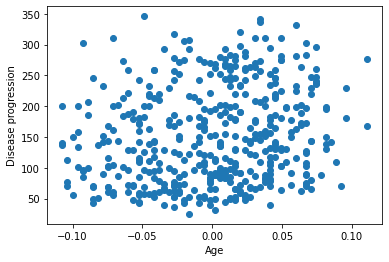

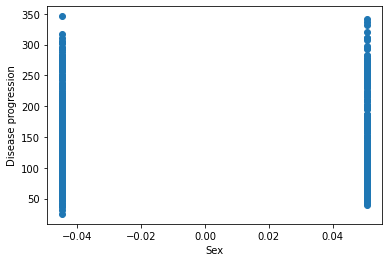

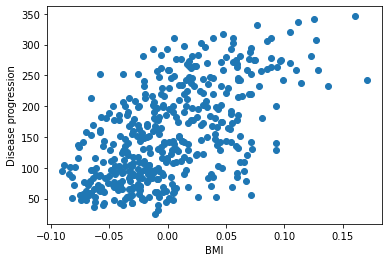

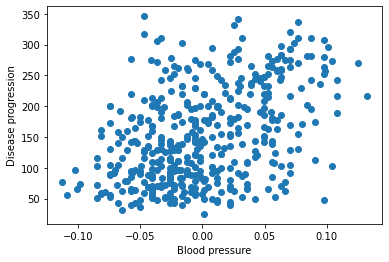

In [167]:
plt.figure()
plt.xlabel('Age')
plt.ylabel('Disease progression')
plt.scatter(X.age, y)
plt.figure()
plt.ylabel('Disease progression')
plt.xlabel('Sex')
plt.scatter(X.sex, y)
plt.figure()
plt.ylabel('Disease progression')
plt.xlabel('BMI')
plt.scatter(X.bmi, y)
plt.figure()
plt.ylabel('Disease progression')
plt.xlabel('Blood pressure')
plt.scatter(X.bp, y)


Umiddelbart ligner det at der er mest sammenhæng mellem BMI og target. Der er mindst ved køn, da det ikke er en numerisk værdi.

## b)
Prædikter Disease Progression udfra kun 1 feature (den som ser ud til at passe bedst i sprm a) –
gøres ved brug af ”fit” med linear regression model. Hvor stor er fejlen ? (root-mean-square
fejl).


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def L2(v):
    if isinstance(v, (type(list), type(np.array))):
        raise TypeError('input must be list or np.array')

    return np.sqrt(np.sum(np.array(v) ** 2))

def RMSE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')

    return L2(h-y) * np.sqrt(1 / len(h))

X_b = X.bmi
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y, test_size=0.3, random_state=42)

# Since we only have 1 feature we need to reshape, so every element is its own array.
X_b_train = X_b_train.values.reshape(-1, 1)
X_b_test = X_b_test.values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_b_train, y_b_train)
y_pred = lr.predict(X_b_test)
rmse = RMSE(y_pred, y_b_test)
print(rmse)

62.32926055201547


## b) cont.
RMSE = 63.73. Dvs. den i gennemsnit regner 63.73 forkert. (Mener jeg)

## c)
Lav et plot med både data og prædiktions-linien – ser modellen ud til at fitte godt til data ?


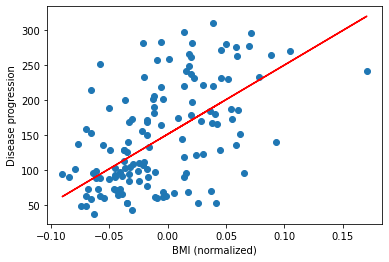

In [169]:
plt.figure()
plt.scatter(X_b_test, y_b_test)
plt.xlabel('BMI (normalized)')
plt.ylabel('Disease progression')
plt.plot(X_b_test, y_pred, color='red')

## c) cont
En feature er ikke nok...

## d)
Plot et histogram over residualerne – er de normalfordelte ? (Dette fortæller noget om data – er der fx. outliers, som kan være meget generende for vores model, eller som er decideret fejlmålinger)


(array([ 2.,  0.,  2.,  2.,  2.,  2.,  2.,  3.,  6.,  6.,  8.,  3.,  5.,
         8.,  6.,  5.,  7., 15.,  9.,  9.,  6.,  4.,  5.,  6.,  4.,  1.,
         1.,  1.,  2.,  1.]),
 array([-158.22791334, -148.29423385, -138.36055436, -128.42687487,
        -118.49319537, -108.55951588,  -98.62583639,  -88.6921569 ,
         -78.75847741,  -68.82479792,  -58.89111842,  -48.95743893,
         -39.02375944,  -29.09007995,  -19.15640046,   -9.22272097,
           0.71095853,   10.64463802,   20.57831751,   30.511997  ,
          40.44567649,   50.37935599,   60.31303548,   70.24671497,
          80.18039446,   90.11407395,  100.04775344,  109.98143294,
         119.91511243,  129.84879192,  139.78247141]),
 <BarContainer object of 30 artists>)

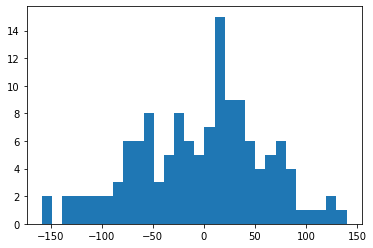

In [170]:
plt.hist(y_pred-y_b_test, bins=30)

## d) cont.
Den er stadig dårlig. Hist er bredt og spredt redt meget.<br>
*Er dataen normalfordelt?*<br>
Det kan diskuteres hvorvidt den er normalfordelt. Man kan lige fornemme en normalfordeling, men den er ikke pæn.

## e)
Prædikter Disease Progression udfra de første 4 features. Find root mean squared error (RMSE) og sammenhold med sprm. b


In [171]:

X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X[['age', 'sex', 'bmi', 'bp']], y, test_size=0.3, random_state=42)

lr2 = LinearRegression()
lr2.fit(X_4_train, y_4_train)
y_pred = lr2.predict(X_4_test)
rmse = RMSE(y_pred, y_4_test)
print(rmse)

60.09095451562426


## e) cont.
RMSE er bedre, men stadig ikke helt god.

## f)
Prøv også med alle features. Er RMSE bedre ?

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr3 = LinearRegression()
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)
rmse = RMSE(y_pred, y_test)
print(rmse)

53.12003915269996


## f) cont.
Det er forbedret, da den er på 53.12 er den stadig ikke helt god.

## g)

*Afprøv samme metode, men nu med et train/test split (fx. 70/30) – Har I overfittet i sprm. f ? (relater til antal parametre i jeres model og antal samples i datasættet)*

Vi har splittet fra start af, så det kan ikke være derfor.

# Øvelse 2:
*I skal afprøve logistisk regression på Height-Weight datasæt (højde og vægt på hhv. mænd og kvinder) – se ”read_height_weight_dataset.py”.*

## a)
*Først skal I afprøve på kun højde data. I skal plotte højde data for mænd (kategori 0) og kvinder
(kategori 1) og dernæst fitte logistisk regression til data. I skal plotte den logistiske funktion.*

In [164]:
import pandas as pd

data = pd.read_csv('./height_weight.csv', sep=';')
# Mænd = 0, kvinder = 1
pound2kg = 0.453592 
inch2cm = 2.54
data.Weight = data.Weight*pound2kg
data.Height = data.Height*inch2cm
data.head()
data.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,168.573602,73.228054
std,0.500025,9.772721,14.564131
min,0.000000,137.828359,29.347460
25%,0.000000,161.304276,61.605982
50%,0.500000,168.447898,73.124894
75%,1.000000,175.702625,84.898599
max,1.000000,200.656806,122.465167


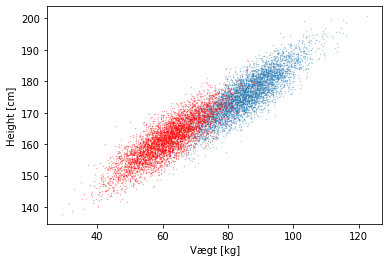

In [165]:
men = data.loc[data['Gender'] == 0]
men.head()
plt.figure()
plt.scatter(men.Weight, men.Height, s=0.1, alpha=0.5)
plt.xlabel('Vægt [kg]')
plt.ylabel('Height [cm]')

women = data.loc[data['Gender'] == 1]
plt.scatter(women.Weight, women.Height, color='red', s=0.1, alpha=0.5)

Text(0, 0.5, 'Probability of being a man')

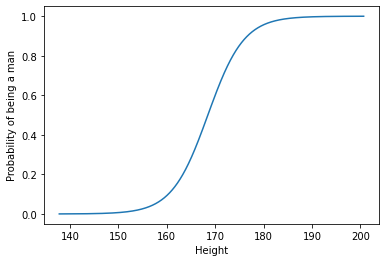

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = (data.Gender == 0).astype(np.int)
X = data.Height

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = np.linspace(np.min(X_train), np.max(X_train), len(y_train)).reshape(-1, 1)

lr = LogisticRegression()
lr.fit(X.values.reshape(-1, 1), y)
y_proba = lr.predict_proba(X_new)

plt.figure()
plt.plot(X_new, y_proba[:, 1])
plt.xlabel('Height')
plt.ylabel('Probability of being a man')